In [1]:
import os
from PIL import Image
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import pandas as pd
import seaborn as sns

files = sorted(os.listdir("results/images"))


with open('results/info.json') as j:
    json_object = json.load(j)

df = pd.DataFrame(json_object['annotations'])

In [2]:
idx = 0
sub = df['ocr'][idx]['word']
points = [sub[i]['points'] for i in range(len(sub))]

In [3]:
def draw_rec(ax, idx, df):
    subs = df['ocr'][idx]['word']
    palette = sns.color_palette('bright', n_colors=12)
    for sub in subs:
        x1, y1, x2, y2 = sub['points'][3][0], sub['points'][3][1], sub['points'][1][0], sub['points'][1][1]
        ax.add_patch(patches.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor = palette[sub['category_id']], fill=False))
        size = 20
        ax.text(x1-size*len(str(sub['category_id'])), y1, sub['category_id'], color=palette[sub['category_id']], size=size)
        ax.set_xticks([])
        ax.set_yticks([])

interactive(children=(IntSlider(value=0, description='idx', max=3999), Output()), _dom_classes=('widget-intera…

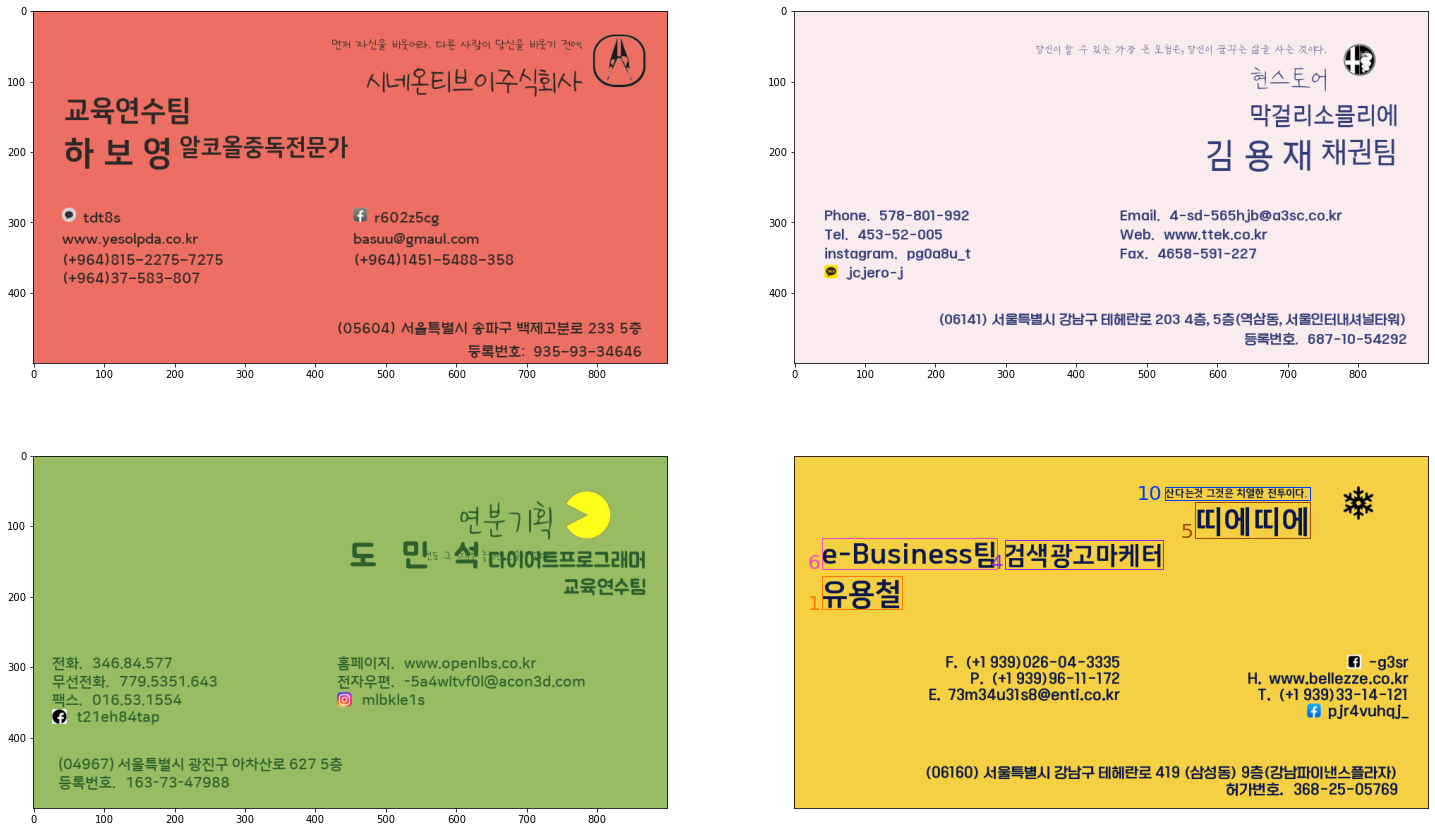

In [4]:
@interact(idx = (0, (len(files)-1)//4))
def show(idx = 0):
    files = sorted(os.listdir("results/images"))
    idx = idx * 4
    image1 = Image.open(f"results/images/{files[idx]}"); image2 = Image.open(f"results/images/{files[idx+1]}"); image3 = Image.open(f"results/images/{files[idx+2]}"); image4 = Image.open(f"results/images/{files[idx+3]}")
    fig = plt.figure(figsize=(25,30))
    ax1 = fig.add_subplot(1, 2, 2); ax2 = fig.add_subplot(1, 2, 1); ax3 = fig.add_subplot(2, 2, 2); ax4 = fig.add_subplot(2, 2, 1)
    ax1.imshow(image1); ax2.imshow(image2); ax3.imshow(image3); ax4.imshow(image4)
    draw_rec(ax1, idx, df); draw_rec(ax2, idx + 1, df); draw_rec(ax3, idx + 2, df); draw_rec(ax4, idx + 3, df)